<a href="https://colab.research.google.com/github/calaghanjo/AIML/blob/main/ML_KNN_Imputers%2CSc%2Cencode(preprocessed_%26_RFE_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("/content/kidney_disease.csv")

In [3]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
dataset.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
dataset.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
dataset[["al"]].value_counts()

,count
al,
0.0,199
1.0,44
2.0,43
3.0,43
4.0,24
5.0,1


In [9]:
dataset[["al"]].isnull().sum()

,0
al,46


In [10]:
from sklearn.preprocessing import StandardScaler
# Scale features before imputation
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset[["al"]])

In [11]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_scaled)

In [12]:
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [13]:
data_imputed

array([[1.        ],
       [4.        ],
       [2.        ],
       [4.        ],
       [2.        ],
       [3.        ],
       [0.        ],
       [2.        ],
       [3.        ],
       [2.        ],
       [2.        ],
       [3.        ],
       [3.        ],
       [1.01694915],
       [3.        ],
       [3.        ],
       [2.        ],
       [1.01694915],
       [0.        ],
       [1.        ],
       [2.        ],
       [1.01694915],
       [4.        ],
       [0.        ],
       [4.        ],
       [0.        ],
       [0.        ],
       [3.        ],
       [1.        ],
       [1.        ],
       [1.01694915],
       [3.        ],
       [1.        ],
       [2.        ],
       [1.        ],
       [2.        ],
       [1.        ],
       [1.01694915],
       [3.        ],
       [2.        ],
       [2.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [3.        ],
       [3.        ],
       [0.        ],
       [3.   

In [14]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["al"])

In [15]:
imputed_df


,al
0,1.0
1,4.0
2,2.0
3,4.0
4,2.0
...,...
395,0.0
396,0.0
397,0.0
398,0.0


In [16]:
imputed_df.value_counts()


,count
al,
0.000000,199
1.016949,46
1.000000,44
2.000000,43
3.000000,43
4.000000,24
5.000000,1


In [17]:
import numpy as np

In [18]:
# Round & clip 'al'
dataset[["al"]] = np.clip(np.round(imputed_df), 0, 5).astype(int)

In [19]:
dataset[["al"]].value_counts()

,count
al,
0,199
1,90
2,43
3,43
4,24
5,1


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              400 non-null    int64  
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [21]:
from sklearn.preprocessing import StandardScaler
# Scale features before imputation
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset[["age"]])

In [22]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_scaled)

In [23]:
data_imputed

array([[-2.03139024e-01],
       [-2.59412412e+00],
       [ 6.13294910e-01],
       [-2.03139024e-01],
       [-2.81888954e-02],
       [ 4.96661491e-01],
       [ 9.63195168e-01],
       [-1.60274005e+00],
       [ 3.01278142e-02],
       [ 8.84445238e-02],
       [-8.65056050e-02],
       [ 6.71611620e-01],
       [ 9.63195168e-01],
       [ 9.63195168e-01],
       [ 9.63195168e-01],
       [-6.69672701e-01],
       [-2.61455734e-01],
       [-2.61455734e-01],
       [ 4.96661491e-01],
       [ 6.13294910e-01],
       [ 5.54978201e-01],
       [ 4.96661491e-01],
       [-2.03139024e-01],
       [-1.77769018e+00],
       [-5.53039282e-01],
       [ 5.54978201e-01],
       [ 1.37141214e+00],
       [ 1.02151188e+00],
       [ 1.37141214e+00],
       [ 9.63195168e-01],
       [ 9.99484667e-17],
       [ 1.25477872e+00],
       [ 5.54978201e-01],
       [ 4.96661491e-01],
       [ 1.07982859e+00],
       [ 7.88245039e-01],
       [ 1.42972884e+00],
       [ 1.19646201e+00],
       [ 1.0

In [24]:
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [25]:
data_imputed

array([[48.        ],
       [ 7.        ],
       [62.        ],
       [48.        ],
       [51.        ],
       [60.        ],
       [68.        ],
       [24.        ],
       [52.        ],
       [53.        ],
       [50.        ],
       [63.        ],
       [68.        ],
       [68.        ],
       [68.        ],
       [40.        ],
       [47.        ],
       [47.        ],
       [60.        ],
       [62.        ],
       [61.        ],
       [60.        ],
       [48.        ],
       [21.        ],
       [42.        ],
       [61.        ],
       [75.        ],
       [69.        ],
       [75.        ],
       [68.        ],
       [51.48337596],
       [73.        ],
       [61.        ],
       [60.        ],
       [70.        ],
       [65.        ],
       [76.        ],
       [72.        ],
       [69.        ],
       [82.        ],
       [46.        ],
       [45.        ],
       [47.        ],
       [35.        ],
       [54.        ],
       [54

In [26]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["age"])

In [27]:
imputed_df

,age
0,48.0
1,7.0
2,62.0
3,48.0
4,51.0
...,...
395,55.0
396,42.0
397,12.0
398,17.0


In [28]:
dataset[["age"]] =np.round(imputed_df).astype(int)

In [29]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48,80.0,1.020,1,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7,50.0,1.020,4,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62,80.0,1.010,2,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48,70.0,1.005,4,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51,80.0,1.010,2,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80.0,1.020,0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42,70.0,1.025,0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12,80.0,1.020,0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17,60.0,1.025,0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [42]:
Df= dataset.drop('id', axis=1)


In [43]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,bp
0,0,48,80.0,1,1,0,NaN,normal,notpresent,notpresent,...,7800,5.2,yes,yes,no,good,no,no,ckd,80
1,1,7,50.0,1,4,0,NaN,normal,notpresent,notpresent,...,6000,NaN,no,no,no,good,no,no,ckd,50
2,2,62,80.0,1,2,3,normal,normal,notpresent,notpresent,...,7500,NaN,no,yes,no,poor,no,yes,ckd,80
3,3,48,70.0,1,4,0,normal,abnormal,present,notpresent,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,70
4,4,51,80.0,1,2,0,normal,normal,notpresent,notpresent,...,7300,4.6,no,no,no,good,no,no,ckd,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80.0,1,0,0,normal,normal,notpresent,notpresent,...,6700,4.9,no,no,no,good,no,no,notckd,80
396,396,42,70.0,1,0,0,normal,normal,notpresent,notpresent,...,7800,6.2,no,no,no,good,no,no,notckd,70
397,397,12,80.0,1,0,0,normal,normal,notpresent,notpresent,...,6600,5.4,no,no,no,good,no,no,notckd,80
398,398,17,60.0,1,0,0,normal,normal,notpresent,notpresent,...,7200,5.9,no,no,no,good,no,no,notckd,60


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              388 non-null    float64
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [45]:
from sklearn.preprocessing import StandardScaler
# Scale features before imputation
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset[["bp"]])

In [46]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_scaled)

In [47]:
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [48]:
data_imputed

array([[ 80.        ],
       [ 50.        ],
       [ 80.        ],
       [ 70.        ],
       [ 80.        ],
       [ 90.        ],
       [ 70.        ],
       [ 76.46907216],
       [100.        ],
       [ 90.        ],
       [ 60.        ],
       [ 70.        ],
       [ 70.        ],
       [ 70.        ],
       [ 80.        ],
       [ 80.        ],
       [ 70.        ],
       [ 80.        ],
       [100.        ],
       [ 60.        ],
       [ 80.        ],
       [ 90.        ],
       [ 80.        ],
       [ 70.        ],
       [100.        ],
       [ 60.        ],
       [ 80.        ],
       [ 70.        ],
       [ 70.        ],
       [ 70.        ],
       [ 70.        ],
       [ 90.        ],
       [ 90.        ],
       [100.        ],
       [ 70.        ],
       [ 90.        ],
       [ 70.        ],
       [ 80.        ],
       [ 80.        ],
       [ 80.        ],
       [ 90.        ],
       [ 70.        ],
       [100.        ],
       [ 80

In [49]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["bp"])

In [50]:
dataset[["bp"]] =np.round(imputed_df).astype(int)

In [51]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,bp
0,0,48,80,1,1,0,NaN,normal,notpresent,notpresent,...,7800,5.2,yes,yes,no,good,no,no,ckd,80
1,1,7,50,1,4,0,NaN,normal,notpresent,notpresent,...,6000,NaN,no,no,no,good,no,no,ckd,50
2,2,62,80,1,2,3,normal,normal,notpresent,notpresent,...,7500,NaN,no,yes,no,poor,no,yes,ckd,80
3,3,48,70,1,4,0,normal,abnormal,present,notpresent,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,70
4,4,51,80,1,2,0,normal,normal,notpresent,notpresent,...,7300,4.6,no,no,no,good,no,no,ckd,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80,1,0,0,normal,normal,notpresent,notpresent,...,6700,4.9,no,no,no,good,no,no,notckd,80
396,396,42,70,1,0,0,normal,normal,notpresent,notpresent,...,7800,6.2,no,no,no,good,no,no,notckd,70
397,397,12,80,1,0,0,normal,normal,notpresent,notpresent,...,6600,5.4,no,no,no,good,no,no,notckd,80
398,398,17,60,1,0,0,normal,normal,notpresent,notpresent,...,7200,5.9,no,no,no,good,no,no,notckd,60


In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [53]:
from sklearn.preprocessing import StandardScaler
# Scale features before imputation
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset[["bu"]])

In [54]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_scaled)

In [55]:
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [56]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["bu"])

In [57]:
imputed_df

,bu
0,36.0
1,18.0
2,53.0
3,56.0
4,26.0
...,...
395,49.0
396,31.0
397,26.0
398,50.0


In [58]:
dataset[["bu"]] =np.round(imputed_df).astype(int)

In [59]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [60]:
from sklearn.preprocessing import StandardScaler
# Scale features before imputation
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset[["su"]])

In [61]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_scaled)


In [62]:

# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [63]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["su"])

In [64]:
dataset[["su"]] =np.round(imputed_df).astype(int)

In [65]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,bp
0,0,48,80,1,1,0,NaN,normal,notpresent,notpresent,...,7800,5.2,yes,yes,no,good,no,no,ckd,80
1,1,7,50,1,4,0,NaN,normal,notpresent,notpresent,...,6000,NaN,no,no,no,good,no,no,ckd,50
2,2,62,80,1,2,3,normal,normal,notpresent,notpresent,...,7500,NaN,no,yes,no,poor,no,yes,ckd,80
3,3,48,70,1,4,0,normal,abnormal,present,notpresent,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,70
4,4,51,80,1,2,0,normal,normal,notpresent,notpresent,...,7300,4.6,no,no,no,good,no,no,ckd,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80,1,0,0,normal,normal,notpresent,notpresent,...,6700,4.9,no,no,no,good,no,no,notckd,80
396,396,42,70,1,0,0,normal,normal,notpresent,notpresent,...,7800,6.2,no,no,no,good,no,no,notckd,70
397,397,12,80,1,0,0,normal,normal,notpresent,notpresent,...,6600,5.4,no,no,no,good,no,no,notckd,80
398,398,17,60,1,0,0,normal,normal,notpresent,notpresent,...,7200,5.9,no,no,no,good,no,no,notckd,60


In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [67]:
dataset[["pcv"]].value_counts()

,count
pcv,
41,21
52,21
48,19
44,19
40,16
43,14
42,13
45,13
32,12


In [68]:
import pandas as pd

In [69]:
data = {
    "41": 21, "52": 21, "48": 19, "44": 19, "40": 16, "43": 14, "42": 13, "45": 13,
    "32": 12, "33": 12, "36": 12, "28": 12, "50": 12, "34": 11, "37": 11, "30": 9,
    "29": 9, "46": 9, "35": 9, "31": 8, "24": 7, "39": 7, "26": 6, "38": 5, "51": 4,
    "53": 4, "47": 4, "49": 4, "54": 4, "25": 3, "27": 3, "22": 3, "19": 2, "23": 2,
    "20": 1, "15": 1, "\t43": 1, "21": 1, "17": 1, "18": 1, "16": 1, "\t?": 1,
    "14": 1, "9": 1
}

In [70]:
s = pd.Series(data, name="count")
s.index.name = "pcv"


In [71]:
# Step 1: strip tabs/spaces
s.index = s.index.str.strip()

In [72]:
# Step 2: replace "?" with "0"
s = s.rename(index={"?": "0"})


In [73]:
# Step 3: convert index to integer
s.index = s.index.astype(int)


In [74]:
# Step 4: group by pcv (merge duplicates like 43 + \t43 and add new 0)
s = s.groupby(level=0).sum()

In [75]:
print(s.sort_index())

pcv
0      1
9      1
14     1
15     1
16     1
17     1
18     1
19     2
20     1
21     1
22     3
23     2
24     7
25     3
26     6
27     3
28    12
29     9
30     9
31     8
32    12
33    12
34    11
35     9
36    12
37    11
38     5
39     7
40    16
41    21
42    13
43    15
44    19
45    13
46     9
47     4
48    19
49     4
50    12
51     4
52    21
53     4
54     4
Name: count, dtype: int64


In [76]:
dataset[["pcv"]].value_counts()

,count
pcv,
41,21
52,21
48,19
44,19
40,16
43,14
42,13
45,13
32,12


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [80]:
# Step 1: Clean 'pcv'
dataset["pcv"] = (
    dataset["pcv"]
    .astype(str)         # make sure everything is string
    .str.strip()         # remove tabs/spaces
    .replace("?", "0")   # replace "?" with 0
    .replace("nan", "0") # if "nan" string exists
)

In [81]:
dataset["pcv"] = pd.to_numeric(dataset["pcv"], errors="coerce").fillna(0).astype(int)


In [82]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset[["pcv"]])


In [83]:
print(data_scaled[:10])

[[ 0.70934935]
 [ 0.35519115]
 [-0.0579934 ]
 [ 0.00103296]
 [ 0.17811206]
 [ 0.41421752]
 [ 0.23713842]
 [ 0.70934935]
 [ 0.06005933]
 [-0.17604614]]


In [84]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_scaled)

In [85]:

# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [86]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["pcv"])

In [87]:
dataset[["pcv"]] =np.round(imputed_df).astype(int)

In [88]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              295 non-null    obj

In [89]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,bp
0,0,48,80,1,1,0,NaN,normal,notpresent,notpresent,...,7800,5.2,yes,yes,no,good,no,no,ckd,80
1,1,7,50,1,4,0,NaN,normal,notpresent,notpresent,...,6000,NaN,no,no,no,good,no,no,ckd,50
2,2,62,80,1,2,3,normal,normal,notpresent,notpresent,...,7500,NaN,no,yes,no,poor,no,yes,ckd,80
3,3,48,70,1,4,0,normal,abnormal,present,notpresent,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,70
4,4,51,80,1,2,0,normal,normal,notpresent,notpresent,...,7300,4.6,no,no,no,good,no,no,ckd,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80,1,0,0,normal,normal,notpresent,notpresent,...,6700,4.9,no,no,no,good,no,no,notckd,80
396,396,42,70,1,0,0,normal,normal,notpresent,notpresent,...,7800,6.2,no,no,no,good,no,no,notckd,70
397,397,12,80,1,0,0,normal,normal,notpresent,notpresent,...,6600,5.4,no,no,no,good,no,no,notckd,80
398,398,17,60,1,0,0,normal,normal,notpresent,notpresent,...,7200,5.9,no,no,no,good,no,no,notckd,60


In [90]:
dataset[["wc"]].value_counts()

,count
wc,
9800,11
6700,10
9200,9
7200,9
9600,9
...,...
16700,1
2200,1
2600,1


In [91]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [93]:
# Step 1: Clean 'wc'
dataset["wc"] = (
    dataset["wc"]
    .astype(str)         # force to string
    .str.strip()         # remove tabs/spaces
    .replace("?", "0")   # replace "?" with 0
    .replace("nan", "0") # replace 'nan' string with 0
)

In [94]:
# Step 2: Convert to numeric
dataset["wc"] = pd.to_numeric(dataset["wc"], errors="coerce").fillna(0).astype(int)

In [95]:
# Step 3: Scale
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset[["wc"]])

In [96]:
print(data_scaled[:10])

[[ 0.36154868]
 [-0.03980046]
 [ 0.29465716]
 [ 0.11627976]
 [ 0.25006281]
 [ 0.36154868]
 [-1.37763092]
 [ 0.16087411]
 [ 0.76289782]
 [ 1.32032718]]


In [97]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_scaled)

In [98]:
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [99]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["wc"])

In [100]:
dataset[["wc"]] =np.round(imputed_df).astype(int)

In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [102]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,bp
0,0,48,80,1,1,0,NaN,normal,notpresent,notpresent,...,7800,5.2,yes,yes,no,good,no,no,ckd,80
1,1,7,50,1,4,0,NaN,normal,notpresent,notpresent,...,6000,NaN,no,no,no,good,no,no,ckd,50
2,2,62,80,1,2,3,normal,normal,notpresent,notpresent,...,7500,NaN,no,yes,no,poor,no,yes,ckd,80
3,3,48,70,1,4,0,normal,abnormal,present,notpresent,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,70
4,4,51,80,1,2,0,normal,normal,notpresent,notpresent,...,7300,4.6,no,no,no,good,no,no,ckd,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80,1,0,0,normal,normal,notpresent,notpresent,...,6700,4.9,no,no,no,good,no,no,notckd,80
396,396,42,70,1,0,0,normal,normal,notpresent,notpresent,...,7800,6.2,no,no,no,good,no,no,notckd,70
397,397,12,80,1,0,0,normal,normal,notpresent,notpresent,...,6600,5.4,no,no,no,good,no,no,notckd,80
398,398,17,60,1,0,0,normal,normal,notpresent,notpresent,...,7200,5.9,no,no,no,good,no,no,notckd,60


In [103]:

import pandas as pd
from sklearn.preprocessing import StandardScaler

In [104]:
# Step 1: Clean 'bgr'
dataset["bgr"] = (
    dataset["bgr"]
    .astype(str)         # force to string
    .str.strip()         # remove tabs/spaces
    .replace("?", pd.NA) # replace "?" with NaN
    .replace("nan", pd.NA) # replace 'nan' string with NaN
)

In [105]:
# Step 2: Convert to numeric
dataset["bgr"] = pd.to_numeric(dataset["bgr"], errors="coerce")

In [106]:
# Step 3: Impute missing values with median
dataset["bgr"] = dataset["bgr"].fillna(dataset["bgr"].median())

In [107]:
# Step 4: Scale
scaler = StandardScaler()
bgr_scaled = scaler.fit_transform(dataset[["bgr"]])

In [108]:
from sklearn.impute import KNNImputer

In [109]:
# Select only the 'bgr' column
bgr_data = dataset[["bgr"]]  # double brackets keep it 2D

In [110]:
# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)
bgr_imputed = imputer.fit_transform(bgr_data)  # shape: (400, 1)

In [111]:
# Convert back to DataFrame and store in original dataset
dataset["bgr"] = bgr_imputed  # replaces original 'bgr' column

In [112]:
dataset[["bgr"]] =np.round(imputed_df).astype(int)

In [113]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             400 non-null    int64  
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [114]:
dataset


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,bp
0,0,48,80,1,1,0,NaN,normal,notpresent,notpresent,...,7800,5.2,yes,yes,no,good,no,no,ckd,80
1,1,7,50,1,4,0,NaN,normal,notpresent,notpresent,...,6000,NaN,no,no,no,good,no,no,ckd,50
2,2,62,80,1,2,3,normal,normal,notpresent,notpresent,...,7500,NaN,no,yes,no,poor,no,yes,ckd,80
3,3,48,70,1,4,0,normal,abnormal,present,notpresent,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,70
4,4,51,80,1,2,0,normal,normal,notpresent,notpresent,...,7300,4.6,no,no,no,good,no,no,ckd,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80,1,0,0,normal,normal,notpresent,notpresent,...,6700,4.9,no,no,no,good,no,no,notckd,80
396,396,42,70,1,0,0,normal,normal,notpresent,notpresent,...,7800,6.2,no,no,no,good,no,no,notckd,70
397,397,12,80,1,0,0,normal,normal,notpresent,notpresent,...,6600,5.4,no,no,no,good,no,no,notckd,80
398,398,17,60,1,0,0,normal,normal,notpresent,notpresent,...,7200,5.9,no,no,no,good,no,no,notckd,60


In [115]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [116]:
# Step 1: Clean 'sod'
dataset["sod"] = (
    dataset["sod"]
    .astype(str)         # force to string
    .str.strip()         # remove tabs/spaces
    .replace("?", pd.NA) # replace "?" with NaN
    .replace("nan", pd.NA) # replace 'nan' string with NaN
)


In [117]:
# Step 2: Convert to numeric
dataset["sod"] = pd.to_numeric(dataset["sod"], errors="coerce")

In [118]:

# Step 3: Impute missing values with median
dataset["sod"] = dataset["sod"].fillna(dataset["sod"].median())

In [119]:
# Step 4: Scale
scaler = StandardScaler()
bgr_scaled = scaler.fit_transform(dataset[["sod"]])

In [120]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_scaled)

In [121]:
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [122]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["sod"])

In [123]:
dataset[["sod"]] =np.round(imputed_df).astype(int)

In [124]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             400 non-null    int64  
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             400 non-null    int64  
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [125]:
dataset['rbc'].value_counts()

,count
rbc,
normal,201
abnormal,47


In [126]:

# Step 1: One-hot encode the 'rbc' column
one_hot = pd.get_dummies(dataset["rbc"], prefix="rbc", drop_first=True,dtype=int)

In [127]:
one_hot

,rbc_normal
0,0
1,0
2,1
3,1
4,1
...,...
395,1
396,1
397,1
398,1


In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             400 non-null    int64  
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             400 non-null    int64  
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [131]:
# Scale the numeric column (the one you encoded)
rbc_scaled = scaler.fit_transform(one_hot)

In [132]:
# Store back in the dataset
dataset["rbc_scaled"] = rbc_scaled

In [133]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(rbc_scaled)



In [134]:
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [135]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["rbc_scaled"])

In [136]:
dataset[["rbc"]] =np.round(imputed_df).astype(int)

In [137]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             400 non-null    int64  
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             400 non-null    int64  
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             400 non-null    int64  
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [138]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,rc,htn,dm,cad,appet,pe,ane,classification,bp,rbc_scaled
0,0,48,80,1,1,0,0,normal,notpresent,notpresent,...,5.2,yes,yes,no,good,no,no,ckd,80,-1.005013
1,1,7,50,1,4,0,0,normal,notpresent,notpresent,...,NaN,no,no,no,good,no,no,ckd,50,-1.005013
2,2,62,80,1,2,3,1,normal,notpresent,notpresent,...,NaN,no,yes,no,poor,no,yes,ckd,80,0.995012
3,3,48,70,1,4,0,1,abnormal,present,notpresent,...,3.9,yes,no,no,poor,yes,yes,ckd,70,0.995012
4,4,51,80,1,2,0,1,normal,notpresent,notpresent,...,4.6,no,no,no,good,no,no,ckd,80,0.995012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80,1,0,0,1,normal,notpresent,notpresent,...,4.9,no,no,no,good,no,no,notckd,80,0.995012
396,396,42,70,1,0,0,1,normal,notpresent,notpresent,...,6.2,no,no,no,good,no,no,notckd,70,0.995012
397,397,12,80,1,0,0,1,normal,notpresent,notpresent,...,5.4,no,no,no,good,no,no,notckd,80,0.995012
398,398,17,60,1,0,0,1,normal,notpresent,notpresent,...,5.9,no,no,no,good,no,no,notckd,60,0.995012


In [139]:
dataset['pc'].value_counts()

,count
pc,
normal,259
abnormal,76


In [140]:
# Step 1: One-hot encode the 'rbc' column
one_hot = pd.get_dummies(dataset["pc"], drop_first=True,dtype=int)

In [141]:
scaler = StandardScaler()

In [142]:
# Scale the numeric column (the one you encoded)
pc_scaled = scaler.fit_transform(one_hot)

In [143]:
# Store back in the dataset
dataset["pc_scaled"] = pc_scaled

In [144]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_scaled)

In [145]:
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [146]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["pc"])

In [147]:
dataset[["pc"]] =np.round(imputed_df).astype(int)

In [148]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             400 non-null    int64  
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             400 non-null    int64  
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [149]:
dataset


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,classification,bp,rbc_scaled,pc_scaled
0,0,48,80,1,1,0,0,1,notpresent,notpresent,...,yes,yes,no,good,no,no,ckd,80,-1.005013,0.737836
1,1,7,50,1,4,0,0,1,notpresent,notpresent,...,no,no,no,good,no,no,ckd,50,-1.005013,0.737836
2,2,62,80,1,2,3,1,1,notpresent,notpresent,...,no,yes,no,poor,no,yes,ckd,80,0.995012,0.737836
3,3,48,70,1,4,0,1,1,present,notpresent,...,yes,no,no,poor,yes,yes,ckd,70,0.995012,-1.355315
4,4,51,80,1,2,0,1,1,notpresent,notpresent,...,no,no,no,good,no,no,ckd,80,0.995012,0.737836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80,1,0,0,1,1,notpresent,notpresent,...,no,no,no,good,no,no,notckd,80,0.995012,0.737836
396,396,42,70,1,0,0,1,1,notpresent,notpresent,...,no,no,no,good,no,no,notckd,70,0.995012,0.737836
397,397,12,80,1,0,0,1,1,notpresent,notpresent,...,no,no,no,good,no,no,notckd,80,0.995012,0.737836
398,398,17,60,1,0,0,1,1,notpresent,notpresent,...,no,no,no,good,no,no,notckd,60,0.995012,0.737836


In [150]:
dataset['pcc'].value_counts()

,count
pcc,
notpresent,354
present,42


In [151]:
# Step 1: One-hot encode the 'rbc' column
one_hot = pd.get_dummies(dataset["pcc"], drop_first=True,dtype=int)

In [152]:

scaler = StandardScaler()

In [153]:
# Scale the numeric column (the one you encoded)
pcc_scaled = scaler.fit_transform(one_hot)

In [154]:
# Store back in the dataset
dataset["pcc_scaled"] = pcc_scaled

In [155]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_scaled)

In [156]:
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [157]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["pcc"])

In [158]:
dataset[["pcc"]] =np.round(imputed_df).astype(int)

In [159]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              396 non-null    object 
 10  bgr             400 non-null    int64  
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             400 non-null    int64  
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [160]:
dataset['pcc'].value_counts()

,count
pcc,
0,375
1,25


In [161]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,dm,cad,appet,pe,ane,classification,bp,rbc_scaled,pc_scaled,pcc_scaled
0,0,48,80,1,1,0,0,1,0,notpresent,...,yes,no,good,no,no,ckd,80,-1.005013,0.737836,-0.342518
1,1,7,50,1,4,0,0,1,0,notpresent,...,no,no,good,no,no,ckd,50,-1.005013,0.737836,-0.342518
2,2,62,80,1,2,3,1,1,0,notpresent,...,yes,no,poor,no,yes,ckd,80,0.995012,0.737836,-0.342518
3,3,48,70,1,4,0,1,1,0,notpresent,...,no,no,poor,yes,yes,ckd,70,0.995012,-1.355315,2.919556
4,4,51,80,1,2,0,1,1,0,notpresent,...,no,no,good,no,no,ckd,80,0.995012,0.737836,-0.342518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80,1,0,0,1,1,0,notpresent,...,no,no,good,no,no,notckd,80,0.995012,0.737836,-0.342518
396,396,42,70,1,0,0,1,1,0,notpresent,...,no,no,good,no,no,notckd,70,0.995012,0.737836,-0.342518
397,397,12,80,1,0,0,1,1,0,notpresent,...,no,no,good,no,no,notckd,80,0.995012,0.737836,-0.342518
398,398,17,60,1,0,0,1,1,0,notpresent,...,no,no,good,no,no,notckd,60,0.995012,0.737836,-0.342518


In [162]:
dataset['ba'].value_counts()

,count
ba,
notpresent,374
present,22


In [163]:
# Step 1: One-hot encode the 'rbc' column
one_hot = pd.get_dummies(dataset["ba"], drop_first=True,dtype=int)

In [164]:
scaler = StandardScaler()

In [165]:
# Scale the numeric column (the one you encoded)
ba_scaled = scaler.fit_transform(one_hot)

In [166]:
# Store back in the dataset
dataset["ba_scaled"] = ba_scaled

In [168]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_scaled)

In [169]:
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [170]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["ba"])

In [171]:
dataset[["ba"]] =np.round(imputed_df).astype(int)

In [172]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    int64  
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             400 non-null    int64  
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [173]:
dataset['ba'].value_counts()

,count
ba,
0,391
1,9


In [174]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,cad,appet,pe,ane,classification,bp,rbc_scaled,pc_scaled,pcc_scaled,ba_scaled
0,0,48,80,1,1,0,0,1,0,0,...,no,good,no,no,ckd,80,-1.005013,0.737836,-0.342518,-0.241249
1,1,7,50,1,4,0,0,1,0,0,...,no,good,no,no,ckd,50,-1.005013,0.737836,-0.342518,-0.241249
2,2,62,80,1,2,3,1,1,0,0,...,no,poor,no,yes,ckd,80,0.995012,0.737836,-0.342518,-0.241249
3,3,48,70,1,4,0,1,1,0,0,...,no,poor,yes,yes,ckd,70,0.995012,-1.355315,2.919556,-0.241249
4,4,51,80,1,2,0,1,1,0,0,...,no,good,no,no,ckd,80,0.995012,0.737836,-0.342518,-0.241249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,80,1,0,0,1,1,0,0,...,no,good,no,no,notckd,80,0.995012,0.737836,-0.342518,-0.241249
396,396,42,70,1,0,0,1,1,0,0,...,no,good,no,no,notckd,70,0.995012,0.737836,-0.342518,-0.241249
397,397,12,80,1,0,0,1,1,0,0,...,no,good,no,no,notckd,80,0.995012,0.737836,-0.342518,-0.241249
398,398,17,60,1,0,0,1,1,0,0,...,no,good,no,no,notckd,60,0.995012,0.737836,-0.342518,-0.241249


In [175]:
dataset['pot'].value_counts()

,count
pot,
5.0,30
3.5,30
4.9,27
4.7,17
4.8,16
4.0,14
3.9,14
4.2,14
4.4,14


In [176]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [177]:
# Step 1: Clean 'pot' with regex → replace all nan-like strings with np.nan
dataset["pot"] = (
    dataset["pot"]
    .astype(str)  # convert everything to string
    .str.strip()  # remove spaces/tabs
    .replace(r'^(?:\?|nan|NaN|NULL|NA|None)?$', np.nan, regex=True)
)

In [178]:
# Step 2: Apply Label Encoding (ignore NaN)
le = LabelEncoder()
not_null_mask = dataset["pot"].notna()
dataset.loc[not_null_mask, "pot"] = le.fit_transform(dataset.loc[not_null_mask, "pot"])

In [179]:
# Step 3: Convert column to numeric
dataset["pot"] = pd.to_numeric(dataset["pot"], errors="coerce")

In [180]:
# Step 4: Apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)
pot_imputed = imputer.fit_transform(dataset[["pot"]])

In [181]:
# Step 5: Apply Standard Scaler
scaler = StandardScaler()
pot_scaled = scaler.fit_transform(pot_imputed)

In [182]:
# Step 6: Put back into DataFrame
dataset["pot"] = pot_scaled.ravel()

In [183]:
dataset[["pot"]] =np.round(imputed_df).astype(int)

In [184]:
dataset['pot'].value_counts()

,count
pot,
0,391
1,9


In [187]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    int64  
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             400 non-null    int64  
 14  pot             400 non-null    int64  
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [188]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,cad,appet,pe,ane,classification,bp,rbc_scaled,pc_scaled,pcc_scaled,ba_scaled
0,0,48,80,1,1,0,0,1,0,0,...,no,good,no,no,ckd,80,-1.005013,0.737836,-0.342518,-0.241249
1,1,7,50,1,4,0,0,1,0,0,...,no,good,no,no,ckd,50,-1.005013,0.737836,-0.342518,-0.241249
2,2,62,80,1,2,3,1,1,0,0,...,no,poor,no,yes,ckd,80,0.995012,0.737836,-0.342518,-0.241249
3,3,48,70,1,4,0,1,1,0,0,...,no,poor,yes,yes,ckd,70,0.995012,-1.355315,2.919556,-0.241249
4,4,51,80,1,2,0,1,1,0,0,...,no,good,no,no,ckd,80,0.995012,0.737836,-0.342518,-0.241249


In [189]:
dataset['rc'].value_counts()

,count
rc,
5.2,18
4.5,16
4.9,14
4.7,11
3.9,10
4.8,10
3.4,9
4.6,9
3.7,8


In [190]:
dataset["rc"] = dataset["rc"].astype(str).str.strip()

In [191]:
# Replace "\t?" with label "3.0"
dataset["rc"] = dataset["rc"].replace("\t?", "3.0")

In [192]:
# Convert to numeric
dataset["rc"] = pd.to_numeric(dataset["rc"], errors="coerce")

In [193]:
dataset['rc'].value_counts()

,count
rc,
5.2,18
4.5,16
4.9,14
4.7,11
3.9,10
4.8,10
5.0,10
4.6,9
3.4,9


In [195]:
# Step 1: Clean 'rc' with regex → replace all nan-like strings with np.nan
dataset["rc"] = (
    dataset["rc"]
    .astype(str)  # convert everything to string
    .str.strip()  # remove spaces/tabs
    .replace(r'^(?:\?|nan|NaN|NULL|NA|None)?$', np.nan, regex=True)
)

In [196]:
# Step 2: Apply Label Encoding (ignore NaN)
le = LabelEncoder()
not_null_mask = dataset["rc"].notna()
dataset.loc[not_null_mask, "rc"] = le.fit_transform(dataset.loc[not_null_mask, "rc"])

In [197]:
# Step 3: Convert column to numeric
dataset["rc"] = pd.to_numeric(dataset["rc"], errors="coerce")

In [198]:
# Step 3: Convert column to numeric
dataset["rc"] = pd.to_numeric(dataset["rc"], errors="coerce")

In [201]:
# Step 4: Apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)
rc_imputed = imputer.fit_transform(dataset[["rc"]])

In [202]:
# Step 5: Apply Standard Scaler
scaler = StandardScaler()
rc_scaled = scaler.fit_transform(rc_imputed)

In [203]:
# Step 6: Put back into DataFrame
dataset["rc"] = rc_scaled.ravel()

In [204]:
dataset[["rc"]] =np.round(imputed_df).astype(int)

In [205]:
dataset['rc'].value_counts()

,count
rc,
0,391
1,9


In [206]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,cad,appet,pe,ane,classification,bp,rbc_scaled,pc_scaled,pcc_scaled,ba_scaled
0,0,48,80,1,1,0,0,1,0,0,...,no,good,no,no,ckd,80,-1.005013,0.737836,-0.342518,-0.241249
1,1,7,50,1,4,0,0,1,0,0,...,no,good,no,no,ckd,50,-1.005013,0.737836,-0.342518,-0.241249
2,2,62,80,1,2,3,1,1,0,0,...,no,poor,no,yes,ckd,80,0.995012,0.737836,-0.342518,-0.241249
3,3,48,70,1,4,0,1,1,0,0,...,no,poor,yes,yes,ckd,70,0.995012,-1.355315,2.919556,-0.241249
4,4,51,80,1,2,0,1,1,0,0,...,no,good,no,no,ckd,80,0.995012,0.737836,-0.342518,-0.241249


In [207]:
dataset['htn'].value_counts()

,count
htn,
no,251
yes,147


In [209]:
# Step 1: One-hot encode the 'rbc' column
one_hot = pd.get_dummies(dataset["htn"], drop_first=True,dtype=int)
scaler = StandardScaler()

In [210]:
# Scale the numeric column (the one you encoded)
pc_scaled = scaler.fit_transform(one_hot)

In [211]:
# Store back in the dataset
dataset["pc_scaled"] = pc_scaled


In [212]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_scaled)

In [213]:
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [214]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["htn"])

In [215]:
dataset[["htn"]] =np.round(imputed_df).astype(int)

In [216]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    int64  
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             400 non-null    int64  
 14  pot             400 non-null    int64  
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [217]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,cad,appet,pe,ane,classification,bp,rbc_scaled,pc_scaled,pcc_scaled,ba_scaled
0,0,48,80,1,1,0,0,1,0,0,...,no,good,no,no,ckd,80,-1.005013,1.311903,-0.342518,-0.241249
1,1,7,50,1,4,0,0,1,0,0,...,no,good,no,no,ckd,50,-1.005013,-0.762252,-0.342518,-0.241249
2,2,62,80,1,2,3,1,1,0,0,...,no,poor,no,yes,ckd,80,0.995012,-0.762252,-0.342518,-0.241249
3,3,48,70,1,4,0,1,1,0,0,...,no,poor,yes,yes,ckd,70,0.995012,1.311903,2.919556,-0.241249
4,4,51,80,1,2,0,1,1,0,0,...,no,good,no,no,ckd,80,0.995012,-0.762252,-0.342518,-0.241249


In [218]:
dataset['dm'].value_counts()

,count
dm,
no,258
yes,134
\tno,3
\tyes,2
yes,1


In [219]:
# Step 1: Convert everything to lowercase string and strip spaces/tabs
dataset["dm"] = dataset["dm"].astype(str).str.lower().str.strip()

In [220]:
# Step 2: Replace messy tabbed values into proper yes/no
dataset["dm"] = dataset["dm"].replace({
    r"^\s*yes\s*$": "yes",
    r"^\s*no\s*$": "no"
}, regex=True)

In [221]:
# Step 3: Verify cleaned labels
print(dataset["dm"].value_counts())

dm
no     261
yes    137
nan      2
Name: count, dtype: int64


In [222]:
dataset['dm'].value_counts()

,count
dm,
no,261
yes,137
nan,2


In [224]:
# Step 1: Clean 'dm' with regex → replace all nan-like strings with np.nan
dataset["dm"] = (
    dataset["dm"]
    .astype(str)  # convert everything to string
    .str.strip()  # remove spaces/tabs
    .replace(r'^(?:\?|nan|NaN|NULL|NA|None)?$', np.nan, regex=True)
)

In [225]:
# Step 2: Apply Label Encoding (ignore NaN)
le = LabelEncoder()
not_null_mask = dataset["dm"].notna()
dataset.loc[not_null_mask, "dm"] = le.fit_transform(dataset.loc[not_null_mask, "dm"])

In [226]:
# Step 3: Convert column to numeric
dataset["dm"] = pd.to_numeric(dataset["dm"], errors="coerce")

In [227]:
# Step 4: Apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)
dm_imputed = imputer.fit_transform(dataset[["dm"]])

In [228]:

# Step 5: Apply Standard Scaler
scaler = StandardScaler()
dm_scaled = scaler.fit_transform(dm_imputed)

In [229]:
# Step 6: Put back into DataFrame
dataset["dm"] = rc_scaled.ravel()

In [230]:
dataset[["dm"]] =np.round(imputed_df).astype(int)

In [231]:
dataset['dm'].value_counts()

,count
dm,
0,230
1,166
2,3
3,1


In [232]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    int64  
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             400 non-null    int64  
 14  pot             400 non-null    int64  
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [233]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,cad,appet,pe,ane,classification,bp,rbc_scaled,pc_scaled,pcc_scaled,ba_scaled
0,0,48,80,1,1,0,0,1,0,0,...,no,good,no,no,ckd,80,-1.005013,1.311903,-0.342518,-0.241249
1,1,7,50,1,4,0,0,1,0,0,...,no,good,no,no,ckd,50,-1.005013,-0.762252,-0.342518,-0.241249
2,2,62,80,1,2,3,1,1,0,0,...,no,poor,no,yes,ckd,80,0.995012,-0.762252,-0.342518,-0.241249
3,3,48,70,1,4,0,1,1,0,0,...,no,poor,yes,yes,ckd,70,0.995012,1.311903,2.919556,-0.241249
4,4,51,80,1,2,0,1,1,0,0,...,no,good,no,no,ckd,80,0.995012,-0.762252,-0.342518,-0.241249


In [234]:
dataset['cad'].value_counts()

,count
cad,
no,362
yes,34
\tno,2


In [235]:
# Step 1: Normalize text
dataset["cad"] = dataset["cad"].astype(str).str.lower().str.strip()

In [236]:
# Step 2: Fix messy values (\tno -> no, etc.)
dataset["cad"] = dataset["cad"].replace({
    r"^\s*yes\s*$": "yes",
    r"^\s*no\s*$": "no"
}, regex=True)

In [237]:
# Step 3: Replace 'nan' string with real NaN
dataset["cad"] = dataset["cad"].replace("nan", np.nan)

In [238]:
# Step 4: Verify
print(dataset["cad"].value_counts(dropna=False))

cad
no     364
yes     34
NaN      2
Name: count, dtype: int64


In [240]:

# Step 1: Clean 'cad' with regex → replace all nan-like strings with np.nan
dataset["cad"] = (
    dataset["cad"]
    .astype(str)  # convert everything to string
    .str.strip()  # remove spaces/tabs
    .replace(r'^(?:\?|nan|NaN|NULL|NA|None)?$', np.nan, regex=True)
)

In [241]:
# Step 2: Apply Label Encoding (ignore NaN)
le = LabelEncoder()
not_null_mask = dataset["cad"].notna()
dataset.loc[not_null_mask, "cad"] = le.fit_transform(dataset.loc[not_null_mask, "cad"])

In [242]:
# Step 3: Convert column to numeric
dataset["cad"] = pd.to_numeric(dataset["cad"], errors="coerce")

In [243]:
# Step 4: Apply KNN Imputer
imputer = KNNImputer(n_neighbors=3)
dm_imputed = imputer.fit_transform(dataset[["cad"]])

In [244]:
# Step 5: Apply Standard Scaler
scaler = StandardScaler()
dm_scaled = scaler.fit_transform(dm_imputed)

In [245]:
# Step 6: Put back into DataFrame
dataset["cad"] = rc_scaled.ravel()

In [246]:
dataset[["cad"]] =np.round(imputed_df).astype(int)

In [247]:
dataset['cad'].value_counts()

,count
cad,
0,230
1,166
2,3
3,1


In [248]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    int64  
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             400 non-null    int64  
 14  pot             400 non-null    int64  
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [249]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,cad,appet,pe,ane,classification,bp,rbc_scaled,pc_scaled,pcc_scaled,ba_scaled
0,0,48,80,1,1,0,0,1,0,0,...,1,good,no,no,ckd,80,-1.005013,1.311903,-0.342518,-0.241249
1,1,7,50,1,4,0,0,1,0,0,...,0,good,no,no,ckd,50,-1.005013,-0.762252,-0.342518,-0.241249
2,2,62,80,1,2,3,1,1,0,0,...,1,poor,no,yes,ckd,80,0.995012,-0.762252,-0.342518,-0.241249
3,3,48,70,1,4,0,1,1,0,0,...,0,poor,yes,yes,ckd,70,0.995012,1.311903,2.919556,-0.241249
4,4,51,80,1,2,0,1,1,0,0,...,0,good,no,no,ckd,80,0.995012,-0.762252,-0.342518,-0.241249


In [250]:
dataset['appet'].value_counts()

,count
appet,
good,317
poor,82


In [252]:
# Step 1: One-hot encode the 'appet' column
one_hot = pd.get_dummies(dataset["appet"], prefix="appet", drop_first=True,dtype=int)
scaler = StandardScaler()

In [253]:
# Scale the numeric column (the one you encoded)
appet_scaled = scaler.fit_transform(one_hot)

In [254]:
# Store back in the dataset
dataset["appet_scaled"] = appet_scaled

In [255]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(appet_scaled)

In [256]:
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [257]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["appet_scaled"])

In [258]:
dataset[["appet"]] =np.round(imputed_df).astype(int)

In [259]:
dataset['appet'].value_counts()

,count
appet,
0,318
1,82


In [260]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    int64  
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             400 non-null    int64  
 14  pot             400 non-null    int64  
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [261]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,appet,pe,ane,classification,bp,rbc_scaled,pc_scaled,pcc_scaled,ba_scaled,appet_scaled
0,0,48,80,1,1,0,0,1,0,0,...,0,no,no,ckd,80,-1.005013,1.311903,-0.342518,-0.241249,-0.507801
1,1,7,50,1,4,0,0,1,0,0,...,0,no,no,ckd,50,-1.005013,-0.762252,-0.342518,-0.241249,-0.507801
2,2,62,80,1,2,3,1,1,0,0,...,1,no,yes,ckd,80,0.995012,-0.762252,-0.342518,-0.241249,1.969276
3,3,48,70,1,4,0,1,1,0,0,...,1,yes,yes,ckd,70,0.995012,1.311903,2.919556,-0.241249,1.969276
4,4,51,80,1,2,0,1,1,0,0,...,0,no,no,ckd,80,0.995012,-0.762252,-0.342518,-0.241249,-0.507801


In [262]:
dataset['pe'].value_counts()

,count
pe,
no,323
yes,76


In [264]:
# Step 1: One-hot encode the 'pe' column
one_hot = pd.get_dummies(dataset["pe"], drop_first=True,dtype=int)
scaler = StandardScaler()

In [265]:
# Scale the numeric column (the one you encoded)
pe_scaled = scaler.fit_transform(one_hot)

In [266]:
# Store back in the dataset
dataset["pe_scaled"] = pe_scaled

In [267]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_scaled)
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [268]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["pe"])
dataset[["pe"]] =np.round(imputed_df).astype(int)

In [269]:
dataset['pe'].value_counts()

,count
pe,
0,321
1,77
2,2


In [270]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    int64  
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             400 non-null    int64  
 14  pot             400 non-null    int64  
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [271]:
dataset['ane'].value_counts()

,count
ane,
no,339
yes,60


In [273]:
# Step 1: One-hot encode the 'ane' column
one_hot = pd.get_dummies(dataset["ane"], drop_first=True,dtype=int)
scaler = StandardScaler()

In [274]:
# Scale the numeric column (the one you encoded)
ane_scaled = scaler.fit_transform(one_hot)

In [275]:
# Store back in the dataset
dataset["ane_scaled"] = ane_scaled

In [276]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_scaled)

In [277]:
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [278]:

# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["ane"])
dataset[["ane"]] =np.round(imputed_df).astype(int)

In [279]:
dataset['ane'].value_counts()

,count
ane,
0,352
1,47
2,1


In [280]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    int64  
 2   bp              400 non-null    int64  
 3   sg              400 non-null    int64  
 4   al              400 non-null    int64  
 5   su              400 non-null    int64  
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    int64  
 11  bu              400 non-null    int64  
 12  sc              383 non-null    float64
 13  sod             400 non-null    int64  
 14  pot             400 non-null    int64  
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [281]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,ane,classification,bp,rbc_scaled,pc_scaled,pcc_scaled,ba_scaled,appet_scaled,pe_scaled,ane_scaled
0,0,48,80,1,1,0,0,1,0,0,...,0,ckd,80,-1.005013,1.311903,-0.342518,-0.241249,-0.507801,-0.484322,-0.420084
1,1,7,50,1,4,0,0,1,0,0,...,0,ckd,50,-1.005013,-0.762252,-0.342518,-0.241249,-0.507801,-0.484322,-0.420084
2,2,62,80,1,2,3,1,1,0,0,...,0,ckd,80,0.995012,-0.762252,-0.342518,-0.241249,1.969276,-0.484322,2.380476
3,3,48,70,1,4,0,1,1,0,0,...,0,ckd,70,0.995012,1.311903,2.919556,-0.241249,1.969276,2.064742,2.380476
4,4,51,80,1,2,0,1,1,0,0,...,0,ckd,80,0.995012,-0.762252,-0.342518,-0.241249,-0.507801,-0.484322,-0.420084


In [282]:
dataset['classification'].value_counts()

,count
classification,
ckd,248
notckd,150
ckd\t,2


In [283]:
# Remove leading/trailing whitespace and tabs from 'classification'
dataset['classification'] = dataset['classification'].str.strip()

In [284]:
# Check the corrected counts
print(dataset['classification'].value_counts())

classification
ckd       250
notckd    150
Name: count, dtype: int64


In [286]:
# Step 1: One-hot encode the 'classification' column
one_hot = pd.get_dummies(dataset["classification"], drop_first=True,dtype=int)
scaler = StandardScaler()

In [287]:
# Scale the numeric column (the one you encoded)
classification_scaled = scaler.fit_transform(one_hot)

In [288]:
# Store back in the dataset
dataset["classification_scaled"] = classification_scaled

In [289]:
# Step 2: Apply KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data_imputed = imputer.fit_transform(data_scaled)

In [290]:
# Step 3: Inverse scaling back to original scale
data_imputed = scaler.inverse_transform(data_imputed)

In [291]:
# Step 4: Convert back to DataFrame
imputed_df = pd.DataFrame(data_imputed, columns=["classification"])
dataset[["classification"]] =np.round(imputed_df).astype(int)

In [292]:
dataset['classification'].value_counts()

,count
classification,
0,227
1,168
2,4
3,1


In [293]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     400 non-null    int64  
 1   age                    400 non-null    int64  
 2   bp                     400 non-null    int64  
 3   sg                     400 non-null    int64  
 4   al                     400 non-null    int64  
 5   su                     400 non-null    int64  
 6   rbc                    400 non-null    int64  
 7   pc                     400 non-null    int64  
 8   pcc                    400 non-null    int64  
 9   ba                     400 non-null    int64  
 10  bgr                    400 non-null    int64  
 11  bu                     400 non-null    int64  
 12  sc                     383 non-null    float64
 13  sod                    400 non-null    int64  
 14  pot                    400 non-null    int64  
 15  hemo  

In [294]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,classification,bp,rbc_scaled,pc_scaled,pcc_scaled,ba_scaled,appet_scaled,pe_scaled,ane_scaled,classification_scaled
0,0,48,80,1,1,0,0,1,0,0,...,1,80,-1.005013,1.311903,-0.342518,-0.241249,-0.507801,-0.484322,-0.420084,-0.774597
1,1,7,50,1,4,0,0,1,0,0,...,0,50,-1.005013,-0.762252,-0.342518,-0.241249,-0.507801,-0.484322,-0.420084,-0.774597
2,2,62,80,1,2,3,1,1,0,0,...,1,80,0.995012,-0.762252,-0.342518,-0.241249,1.969276,-0.484322,2.380476,-0.774597
3,3,48,70,1,4,0,1,1,0,0,...,0,70,0.995012,1.311903,2.919556,-0.241249,1.969276,2.064742,2.380476,-0.774597
4,4,51,80,1,2,0,1,1,0,0,...,0,80,0.995012,-0.762252,-0.342518,-0.241249,-0.507801,-0.484322,-0.420084,-0.774597


In [295]:
# Dropping multiple columns
dataset = dataset.drop(['id','rbc_scaled', 'pc_scaled', 'pcc_scaled','ba_scaled', 'appet_scaled', 'pe_scaled', 'ane_scaled', 'classification_scaled'], axis=1)


In [296]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wc,rc,htn,dm,cad,appet,pe,ane,classification,bp
0,48,80,1,1,0,0,1,0,0,7800,...,7800,0,1,1,1,0,0,0,1,80
1,7,50,1,4,0,0,1,0,0,6000,...,6000,0,0,0,0,0,0,0,0,50
2,62,80,1,2,3,1,1,0,0,7500,...,7500,0,1,1,1,1,0,0,1,80
3,48,70,1,4,0,1,1,0,0,6700,...,6700,0,0,0,0,1,0,0,0,70
4,51,80,1,2,0,1,1,0,0,7300,...,7300,0,0,0,0,0,0,0,0,80


In [297]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

In [298]:
# Assume 'classification' is the target
X = dataset.drop('classification', axis=1)
y = dataset['classification']

In [299]:
# If there are categorical columns, encode them first
X = pd.get_dummies(X, drop_first=True)

In [300]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [301]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=5)  # choose top 5 features
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)

In [303]:
# Selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Reduce X_train and X_test to selected features only
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

Selected Features: Index(['bgr', 'wc', 'htn', 'dm', 'cad'], dtype='object')


In [304]:
model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

In [305]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [306]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [307]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00         1

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [309]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

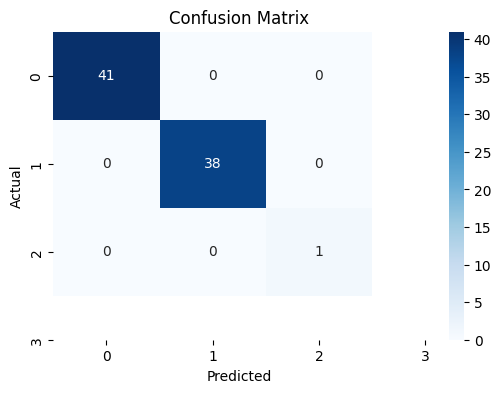

In [310]:
# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()